## Twitter and the 2016 Presidential Election

- member 1: Abigail Gutierrez
- member 2: Andrew Chang 
- member 3: Daniel Raygoza
- member 4: Chloe Dinh-Luong
- member 5: Harneet Dhillon

### Introduction
This study examines political polarization and the dynamics of emotion between messages from Hillary and Donald Trump during the 2016 presidential election, known for highlighting growing influence of social media platforms, particularly Twitter and Facebook, in our live. The 2016 election was convoluted and Twitter was often used not only for informing the public of their candidacy, but also to express extreme, never-before seen resentment as well as deter accusations from the opposing candidate. Using over 3000 tweets from the two major-party presidential nominees, we analyzed the sentiment of tweets using utilize NLP techniques to answer two research questions:

    RQ1: How does sentiment between Trump and Clinton vary over the course of the 2016 election? 
    
    RQ2: Is there a correlation between the sentiment scores of Trump and Clinton and their users' popularity (number of likes) in the dataset?
    
Overall, sentiment between candidates varied highly throughout the election (1.1). Increases in positive sentiment scores may be representative of campaign pushes on social media. There was also no correlation between sentiment and user popularity in the dataset. 

### Dataset Description
The dataset contained 28 columns of data, several of these were not relevant to our research questions. Thus, using .drop(), we dropped the unnecessary columns and only kept the necessary ones: handle, text, time, retweet_count, and favorite_count. 

In [12]:
#Import Pandas and read data 
import pandas as pd
df = pd.read_csv("tweets.csv")

#Calculate statistical measures to gain a basic undestanding of dataset
df.describe()
df.head()

##Drop columns 
df.drop(['longitude', 'latitude', 'place_id',
         'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'], axis=1, inplace=True)
print(df.columns)

Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count'],
      dtype='object')


### Preprocessing
In order to clean the text, we had to remove URLS, mentions, hashtags, special characters, and extra spaces. A function called clean_text was created in order to accomplish this goal. Within the function, re.sub() was used several times to remove these unwanted characters in each of the tweets. Then, a variable named “cleaned text” was created so that it can be used in the next step.

The old text that was unclean and contained unwanted characters such as URLs and hashtags was replaced with the new variable created in step four. Now, all the cleaned values from the cleaned column are in the text. The code for this step was: cleaned_column = clean_text(df[‘text’]).

In [13]:
#Import neccesary libraries 
import re

#Text-cleaning 
def clean_text(column):
    cleaned_column = column.apply(lambda text: re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE))  # remove URLs
    cleaned_column = cleaned_column.apply(lambda text: re.sub(r'@\w+', '', text))  # remove mentions
    cleaned_column = cleaned_column.apply(lambda text: re.sub(r'#\w+', '', text))  # remove hashtags
    cleaned_column = cleaned_column.apply(lambda text: re.sub(r'\W', ' ', text))  # remove special characters
    cleaned_column = cleaned_column.apply(lambda text: re.sub(r'\s+', ' ', text))  # remove extra spaces
    return cleaned_column.str.strip()

cleaned_column = clean_text(df['text'])
df['text'] = cleaned_column #replaces the values in the 'text' column with the cleaned values from cleaned_column

### Analysis
The dataset used for this project contains information on tweets from Hillary Clinton and Donald Trump, encompassing the 2016 US Presidential Election period. With 6444 rows and 28 columns, the dataset offers comprehensive data for analysis. For our study, we specifically focus on five key columns: handle, text, time, retweet_count, and favorite_count. The dataset provides valuable insights into the candidates' tweet engagement, with retweet counts ranging from 123 to 490,180 and favorite counts spanning from 274 to 660,384. Additionally, we note that 11.2% of the tweets were retweets, while 88.9% were original tweets. These tweets were collected from January 4th, 2016 to September 27th, 2016, allowing us to capture the candidates' messaging throughout the campaign period.

We chose sentiment analysis as the primary method for this research project due to its relevance in understanding the emotional content and attitudes expressed in tweets during the 2016 US Presidential Election. Sentiment analysis provides a quantitative measure of the valence or arousal of emotions conveyed in text, allowing us to examine how candidates' sentiments varied over time and whether these sentiments correlated with tweet popularity. By applying sentiment analysis, we can uncover the emotional strategies employed by candidates on Twitter and assess the impact of these strategies on public reception.

Moreover, sentiment analysis proved to be the most suitable method for our research goals, as it aligned with both of our main research questions. The first research question sought to investigate the variation in sentiment scores over time for Donald Trump and Hillary Clinton in the dataset. By analyzing the sentiment scores of their tweets, we could track the shifts in emotional tone throughout their respective campaigns. The second research question aimed to explore the correlation between sentiment scores and tweet popularity, providing insights into the relationship between the candidates' sentiments and their engagement with the Twitter audience. Sentiment analysis allowed us to address both research questions comprehensively, as it enabled us to measure sentiments quantitatively and analyze their association with tweet popularity. By analyzing sentiment scores and tweet engagement, we gain insights into how candidates utilized Twitter and how sentiments evolved over time. The absence of a correlation between sentiment and popularity underscores the complex dynamics of social media influence in political campaigns.

In [14]:
!pip install nltk

In [15]:
#Import necessary libraries
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

#Calcuate sentiment scores and create new column 
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x)["compound"])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
#Convert to datatime and set 'time' column as the index
df['time'] = pd.to_datetime(df['time'])  
df = df.set_index('time', drop=False)

### Visualization

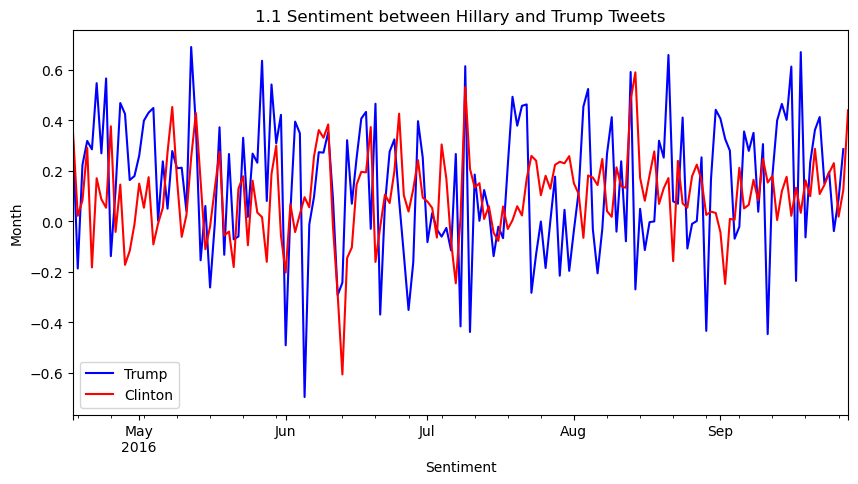

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#Separating Hillary and Trump's Tweets by handles
realDonaldTrump = df[df.handle == 'realDonaldTrump']
hillaryClinton = df[df.handle == 'HillaryClinton']

#Find the common start date
start_date = max(realDonaldTrump.index.min(), hillaryClinton.index.min())

#Filter the data to include only dates after the common start date
realDonaldTrump = realDonaldTrump[realDonaldTrump.index >= start_date]
hillaryClinton = hillaryClinton[hillaryClinton.index >= start_date]

#Graphing sentiment scores of tweets over time
plt.figure(figsize=(10, 5))
realDonaldTrump.resample('D')['sentiment_scores'].mean().plot(label="Trump", color='blue')
hillaryClinton.resample('D')['sentiment_scores'].mean().plot(label="Clinton", color='red')

#Add title 
plt.title('1.1 Sentiment between Hillary and Trump Tweets')
plt.xlabel("Sentiment")
plt.ylabel("Month")
plt.legend()
plt.show()

### Sentiment Scores vs User Popularity (Trump)

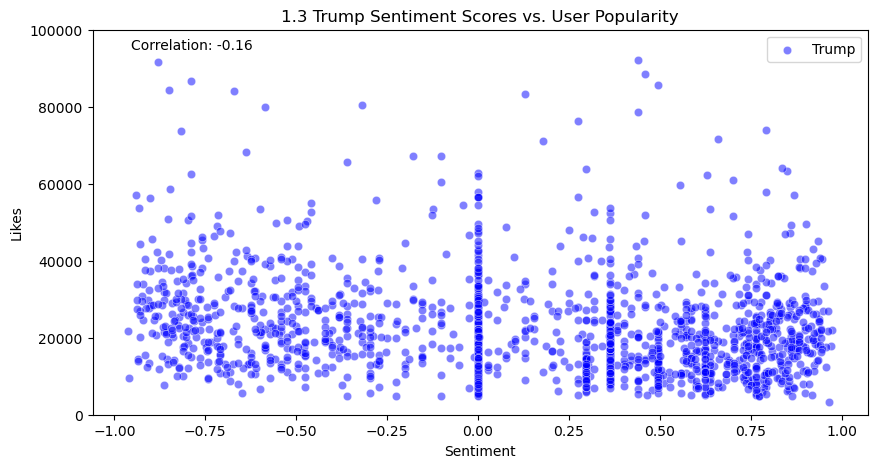

In [18]:
#Create scatter-plot 
correlation = realDonaldTrump['sentiment_scores'].corr(realDonaldTrump['favorite_count'])
plt.figure(figsize=(10, 5))
sns.scatterplot(x="sentiment_scores", y="favorite_count", data=realDonaldTrump, label="Trump", color='blue', alpha=0.5)

#Set y-axis limit 
plt.ylim(0, 100000)

#Add title and axis labels
plt.legend()
plt.title('1.3 Trump Sentiment Scores vs. User Popularity')
plt.xlabel("Sentiment")
plt.ylabel("Likes")
plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
plt.show()

### Sentiment Scores vs User Popularity (Clinton)

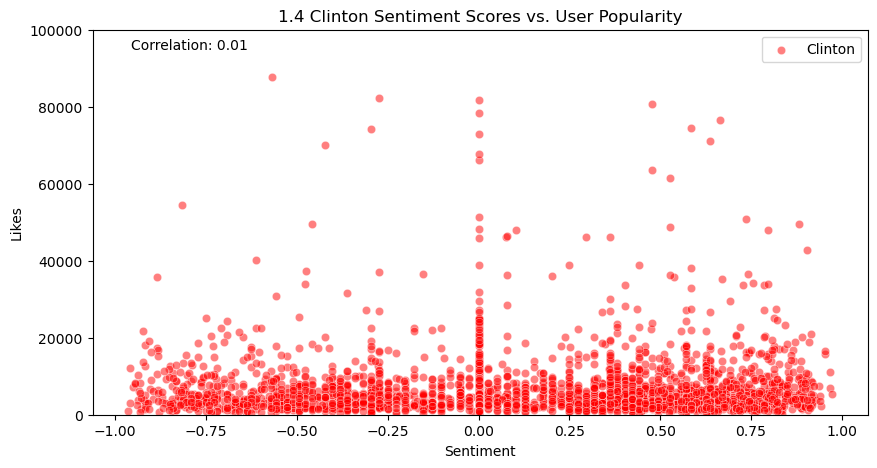

In [19]:
#Create scatter-plot 
correlation = hillaryClinton['sentiment_scores'].corr(hillaryClinton['favorite_count'])
plt.figure(figsize=(10, 5))
sns.scatterplot(x="sentiment_scores", y="favorite_count", data=hillaryClinton, label="Clinton", color='red', alpha=0.5)

#Set y-axis limit
plt.ylim(0, 100000)

#Add title 
plt.legend()
plt.title('1.4 Clinton Sentiment Scores vs. User Popularity')
plt.xlabel("Sentiment")
plt.ylabel("Likes")
plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
plt.show()

### Results & Findings
In the first sentiment analysis we conducted, we found stark differences between the scores for Donald Trump and Hillary Clinton. Data for Donald Trump was available for the entirety of January-September 2018, while data for Clinton was only available from mid-April and onward. Both candidates received polarizing sentiments on Twitter, with each being mentioned in both very positive and very negative contexts. Interestingly, Donald Trump received both the highest and negative sentiment scores for the timeframe observed. Sentiment for Clinton appeared to grow positive towards the end of September, which could represent a last-minute push in her campaign as Election Day approached. From the data, we can infer that Donald Trump appears to be the most controversial and polarizing among the candidates since he received a numerous amount of extremely positive and extremely negative coverage on Twitter.

For the second analysis, we looked to find a connection between sentiment scores and the popularity of the candidates. We coded two scatter plots to visualize the relationship between sentiment and popularity, characterized by the likes each tweet received. Both scatter plots had a relatively uniform distribution of mentions in relation to sentiment score, with no obvious change in popularity across differing sentiments. The data for Trump showed that the tweets in which he was mentioned, no matter the sentiment score, received far more likes on average compared to those in which Clinton was mentioned. We could infer that Trump garnered much more popularity and infamy than his counterpart. The lack of any clear evidence from the scatter plots allows us to conclude that there is no relationship between sentiment and popularity.



## Contributions
- member 1: Abigail Gutierrez: Intro and 1st RQ writing, visualization coding
- member 2: Andrew Chang: 2nd RQ writing, dataset coding, preprocessing coding, analysis coding, and visualization coding
- member 3: Daniel Raygoza: Results writing 
- member 4: Chloe Dinh-Luong: Analysis writing, visualization coding 
- member 5: Harneet Dhillon: Dataset writing 